In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '/Users/kanaha/statistics/SSDSE-D-2023.xlsx'
df = pd.read_excel(file_path)
print(df.head())

  SSDSE-D-2023   2021年 Prefecture         MA00           MB00  MB01 MB011  \
0         男女の別   地域コード       都道府県  推定人口（10歳以上）  学習・自己啓発・訓練の総数   外国語    英語   
1         0_総数  R00000         全国       112462           39.6  14.1  12.8   
2         0_総数  R01000        北海道         4614             35  11.1   9.9   
3         0_総数  R02000        青森県         1090           25.4   7.4   6.6   
4         0_総数  R03000        岩手県         1075           28.9   7.7   7.1   

      MB012             MB02        MB021  ... MG20   MG51 MG52 MG53  \
0  英語以外の外国語  商業実務・ビジネス関係(総数)  パソコンなどの情報処理  ...  その他  通勤・通学   仕事   学業   
1       4.2             20.1         16.5  ...   16     79  340  393   
2       3.3               17         14.1  ...   15     64  343  391   
3         2             12.7         10.3  ...   12     61  370  423   
4       2.4             12.8         10.3  ...   17     63  362  472   

       MH01      MH02      MH03      MH04      MH51       MH52  
0        起床      朝食開始      夕食開始        

In [3]:
# Excelファイルを読み込む際に、ヘッダーを2行目（インデックス1）にする
df = pd.read_excel(file_path, header=1)
#２列目を削除する
df = df.drop(df.columns[1], axis=1)

print(df.head())

   男女の別 都道府県  推定人口（10歳以上）  学習・自己啓発・訓練の総数   外国語    英語  英語以外の外国語  \
0  0_総数   全国       112462           39.6  14.1  12.8       4.2   
1  0_総数  北海道         4614           35.0  11.1   9.9       3.3   
2  0_総数  青森県         1090           25.4   7.4   6.6       2.0   
3  0_総数  岩手県         1075           28.9   7.7   7.1       2.4   
4  0_総数  宮城県         2065           37.5  12.4  10.9       4.0   

   商業実務・ビジネス関係(総数)  パソコンなどの情報処理  商業実務・ビジネス関係  ...  その他.4  通勤・通学.1  仕事.1  学業.1  \
0             20.1         16.5          8.5  ...     16       79   340   393   
1             17.0         14.1          6.7  ...     15       64   343   391   
2             12.7         10.3          5.2  ...     12       61   370   423   
3             12.8         10.3          5.4  ...     17       63   362   472   
4             18.9         16.0          7.4  ...     16       73   352   395   

         起床      朝食開始      夕食開始        就寝        出勤  仕事からの帰宅時間  
0  06:38:00  07:11:00  18:58:00  23:04:00  08:20:00

In [4]:
plt.rcParams['font.family'] = 'Hiragino Sans GB' # Macの場合の例
plt.rcParams['axes.unicode_minus'] = False # マイナス記号を正しく表示するため

##  趣味・娯楽における男女格差の要因分析

In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# データDの読み込み（仮定）
# 実際には、ご自身のファイルパスに合わせて修正してください
file_path = 'SSDSE-D-2023.xlsx'
df_raw = pd.read_excel(file_path, header=1)

# 2列目（地域コード）を削除
df_raw = df_raw.drop(df_raw.columns[1], axis=1)

# 男女別のデータに分割
df_male = df_raw[df_raw['男女の別'] == '1_男'].copy()
df_female = df_raw[df_raw['男女の別'] == '2_女'].copy()

# 都道府県名をキーとして結合するためにインデックスを設定
df_male.set_index('都道府県', inplace=True)
df_female.set_index('都道府県', inplace=True)

# 目的変数と説明変数を作成するためのデータフレームを初期化
df_diff = pd.DataFrame(index=df_male.index)

# 目的変数: 趣味・娯楽の男女格差
df_diff['趣味・娯楽の格差'] = df_female['趣味・娯楽の総数'] - df_male['趣味・娯楽の総数']

# 説明変数: 各活動の男女格差
df_diff['スポーツの格差'] = df_female['スポーツの総数'] - df_male['スポーツの総数']
df_diff['学習・自己啓発の格差'] = df_female['学習・自己啓発・訓練の総数'] - df_male['学習・自己啓発・訓練の総数']
df_diff['ボランティアの格差'] = df_female['ボランティア活動の総数'] - df_male['ボランティア活動の総数']
df_diff['睡眠時間の格差'] = df_female['睡眠'] - df_male['睡眠']

# 推定人口を説明変数として追加
# 男女の合計値として、男性の推定人口を使用（女性もほぼ同じ値のため）
df_diff['推定人口'] = df_male['推定人口（10歳以上）']

# 重回帰分析の実行
# 目的変数
y = df_diff['趣味・娯楽の格差']

# 説明変数
X = df_diff[['スポーツの格差', '学習・自己啓発の格差', 'ボランティアの格差', '睡眠時間の格差', '推定人口']]

# 定数項の追加（切片）
X = sm.add_constant(X)

# モデルの構築とフィッティング
model = sm.OLS(y, X)
results = model.fit()

# 結果の表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               趣味・娯楽の格差   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     2.593
Date:                Sat, 16 Aug 2025   Prob (F-statistic):             0.0393
Time:                        13:59:39   Log-Likelihood:                -60.892
No. Observations:                  48   AIC:                             133.8
Df Residuals:                      42   BIC:                             145.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2437      0.536     -0.455      0.6

1. モデル全体の評価
R-squared (決定係数): 0.236
これは、モデルが目的変数である「趣味・娯楽の格差」の変動の約23.6%を説明できていることを意味します。この値は高くないため、このモデルでは「趣味・娯楽の格差」を完全に説明できておらず、他に影響を与える要因があることを示唆しています。
F-statistic (F統計量): 2.593, Prob (F-statistic): 0.0393
このp値は0.05を下回っているため、このモデル全体は統計的に有意であると判断できます。つまり、すべての説明変数のうち、少なくとも1つは目的変数に有意な影響を与えていると言えます。
2. 個々の説明変数の評価
ボランティアの格差 (ボランティアの格差):
coef (係数): 0.1509
P>|t| (p値): 0.020
このp値は0.05を下回っており、統計的に有意です。係数がプラスであることから、「ボランティア活動における男女格差が大きい都道府県ほど、趣味・娯楽における男女格差も大きい」という正の相関関係があることが示されました。
スポーツの格差 (スポーツの格差):
coef (係数): 0.1105
P>|t| (p値): 0.096
p値は0.05をわずかに上回っていますが、一般的に0.10を下回る場合は「弱い有意性」があると考えられます。プラスの係数から、スポーツ活動の男女格差が大きいほど、趣味・娯楽の男女格差も大きい傾向にあることが示唆されます。
その他の変数:
学習・自己啓発の格差、睡眠時間の格差、推定人口のp値はすべて0.10を大きく上回っており、これらは統計的に有意ではないと判断されます。つまり、これらの変数と「趣味・娯楽の格差」との間には、このモデルにおいては明確な関係性を見出すことができませんでした。
3. 注意点
多重共線性 (Multicollinearity):
Notesの欄にThe condition number is large...This might indicate that there are strong multicollinearity...と記載されています。これは、説明変数間に高い相関がある可能性があることを示しています。多重共線性が存在すると、係数の解釈が不安定になることがあるため注意が必要です。
結論
この重回帰分析の結果から、都道府県ごとの「趣味・娯楽の男女格差」は、「ボランティア活動の男女格差」と正の関係があることが統計的に有意に示されました。また、「スポーツ活動の男女格差」も弱いながらも同様の関係性を示唆しています。一方で、「学習・自己啓発の格差」「睡眠時間の格差」「推定人口」は、「趣味・娯楽の格差」と統計的に有意な関係はないと結論付けられます。

##  仕事・家事時間の男女格差の要因分析

In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# データDの読み込み（ファイルパスはご自身の環境に合わせて修正してください）
file_path = 'SSDSE-D-2023.xlsx'
df_raw = pd.read_excel(file_path, header=1)

# 不要な列を削除
df_raw = df_raw.drop(df_raw.columns[1], axis=1)

# 男女別のデータに分割
df_male = df_raw[df_raw['男女の別'] == '1_男'].copy()
df_female = df_raw[df_raw['男女の別'] == '2_女'].copy()

# 都道府県名をキーとしてインデックスを設定
df_male.set_index('都道府県', inplace=True)
df_female.set_index('都道府県', inplace=True)

# 目的変数と説明変数を格納するデータフレームを作成
df_diff = pd.DataFrame(index=df_male.index)

# 目的変数: 仕事時間の男女格差（男性 - 女性）と家事時間の男女格差（女性 - 男性）
df_diff['仕事時間の格差'] = df_male['仕事'] - df_female['仕事']
df_diff['家事時間の格差'] = df_female['家事'] - df_male['家事']

# 説明変数: 趣味・娯楽とスポーツ活動の男女格差
df_diff['趣味・娯楽の格差'] = df_female['趣味・娯楽'] - df_male['趣味・娯楽']
df_diff['スポーツの格差'] = df_female['スポーツ'] - df_male['スポーツ']

# 推定人口を説明変数として追加
df_diff['推定人口'] = df_male['推定人口（10歳以上）']

# ==================================
# モデル1: 仕事時間の男女格差の分析
# ==================================
print("### モデル1: 仕事時間の男女格差の分析結果 ###\n")

# 目的変数と説明変数の設定
y1 = df_diff['仕事時間の格差']
X1 = df_diff[['趣味・娯楽の格差', 'スポーツの格差', '推定人口']]

# 定数項の追加
X1 = sm.add_constant(X1)

# モデルの構築とフィッティング
model1 = sm.OLS(y1, X1)
results1 = model1.fit()

# 結果の表示
print(results1.summary())


# ==================================
# モデル2: 家事時間の男女格差の分析
# ==================================
print("\n\n### モデル2: 家事時間の男女格差の分析結果 ###\n")

# 目的変数と説明変数の設定
y2 = df_diff['家事時間の格差']
X2 = df_diff[['趣味・娯楽の格差', 'スポーツの格差', '推定人口']]

# 定数項の追加
X2 = sm.add_constant(X2)

# モデルの構築とフィッティング
model2 = sm.OLS(y2, X2)
results2 = model2.fit()

# 結果の表示
print(results2.summary())

### モデル1: 仕事時間の男女格差の分析結果 ###

                            OLS Regression Results                            
Dep. Variable:                仕事時間の格差   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.4227
Date:                Sat, 16 Aug 2025   Prob (F-statistic):              0.738
Time:                        14:04:09   Log-Likelihood:                -189.79
No. Observations:                  48   AIC:                             387.6
Df Residuals:                      44   BIC:                             395.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        109.1985 

この重回帰分析の結果は、趣味・娯楽、スポーツ、推定人口といった要因が、仕事時間の男女格差を説明できていないことを示しています。
モデル全体の評価
R-squared (決定係数): 0.028
このモデルは、目的変数である仕事時間の男女格差の変動をわずか2.8%しか説明できていません。これはモデルの当てはまりが非常に悪いことを意味します。
F-statistic (F統計量): 0.4227, Prob (F-statistic): 0.738
このp値は0.05をはるかに上回っており、このモデル全体が統計的に有意ではないことを示しています。つまり、採用した説明変数のどれも、仕事時間の男女格差に全体として影響を与えているとは言えません。
個々の説明変数の評価
趣味・娯楽の格差 (趣味・娯楽の格差):
P>|t| (p値): 0.517
p値が0.05を大きく上回っているため、この変数は統計的に有意ではありません。趣味・娯楽における男女格差と仕事時間の男女格差には、このモデルでは明確な関係が見られません。
スポーツの格差 (スポーツの格差):
P>|t| (p値): 0.452
同様に、p値が0.05を上回っているため、統計的に有意ではありません。スポーツ活動における男女格差も、仕事時間の男女格差を説明できていません。
推定人口 (推定人口):
P>|t| (p値): 0.617
この変数も統計的に有意ではありません。都道府県の人口規模は、仕事時間の男女格差に影響を与えていないようです。
結論と考察
この分析結果は、趣味・娯楽やスポーツといった余暇活動の男女格差が、仕事時間の男女格差に直接的な影響を与えているとは言えないことを示しています。仕事時間の男女格差は、このモデルに含まれていない別の要因、たとえば産業構造、育児や介護の負担の男女差、就業形態（正規・非正規）の割合などによって説明される可能性が高いと考えられます。
また、Notesに記載されているように、多重共線性（説明変数間の強い相関）の可能性も示唆されています。ただし、このモデルではF統計量が有意ではないため、多重共線性の影響を深く考察する前に、モデル自体が不適切であると結論付けるのが妥当です。

## データAの整理

In [ ]:
# # データAの読み込み
# file_path_a = 'SSDSE-A-2025.xlsx'
# df_a_raw = pd.read_excel(file_path_a, header=[0, 1])

# # ヘッダーを結合
# df_a_raw.columns = ['_'.join(map(str, col)).strip() for col in df_a_raw.columns.values]

# # 新しい列名を確認
# print(df_a_raw.columns)

Index(['SSDSE-A-2025_Unnamed: 0_level_1', 'Prefecture_Unnamed: 1_level_1',
       'Municipality_年度', 'A1101_2020', 'A110101_2020', 'A110102_2020',
       'A1102_2020', 'A110201_2020', 'A110202_2020', 'A1301_2020',
       ...
       'H6130_2021', 'H6131_2021', 'H6132_2021', 'I510120_2022', 'I5102_2022',
       'I5103_2022', 'I6100_2022', 'I6200_2022', 'I6300_2022', 'J250302_2022'],
      dtype='object', length=128)


In [ ]:
import pandas as pd

# データAの読み込み
# ファイルパスはご自身の環境に合わせて修正してください
file_path_a = 'SSDSE-A-2025.xlsx'
df_a_raw = pd.read_excel(file_path_a, header=[0, 1])

# ヘッダーの数値を文字列に変換し、列名を結合
df_a_raw.columns = ['_'.join(map(str, col)).strip() for col in df_a_raw.columns.values]

# 都道府県ごとのデータに集計するためのデータフレームを作成
df_a_pref = pd.DataFrame()

# 数量データの集計（合計）
# 主な人口統計、経済統計、施設数などを合計
df_a_pref['総人口'] = df_a_raw.groupby('Prefecture_Unnamed: 1_level_1')['A1101_2020'].sum()
df_a_pref['外国人人口'] = df_a_raw.groupby('Prefecture_Unnamed: 1_level_1')['A1700_2020'].sum()
df_a_pref['世帯数'] = df_a_raw.groupby('Prefecture_Unnamed: 1_level_1')['A7101_2020'].sum()
df_a_pref['事業所数'] = df_a_raw.groupby('Prefecture_Unnamed: 1_level_1')['C2108_2021'].sum()
df_a_pref['就業者数'] = df_a_raw.groupby('Prefecture_Unnamed: 1_level_1')['F1102_2020'].sum()
df_a_pref['一般病院数'] = df_a_raw.groupby('Prefecture_Unnamed: 1_level_1')['I6100_2022'].sum()
df_a_pref['小学校数'] = df_a_raw.groupby('Prefecture_Unnamed: 1_level_1')['E2101_2023'].sum()
df_a_pref['中学校数'] = df_a_raw.groupby('Prefecture_Unnamed: 1_level_1')['E3101_2023'].sum()
df_a_pref['総面積'] = df_a_raw.groupby('Prefecture_Unnamed: 1_level_1')['B1101_2021'].sum()

# 比率データの再計算
# 各比率に必要な列を事前に数値型に変換
cols_for_ratio = ['A1301_2020', 'A1303_2020', 'A1101_2020', 'F1102_2020', 'F1107_2020', 'F1108_2020']
for col in cols_for_ratio:
    df_a_raw[col] = pd.to_numeric(df_a_raw[col].astype(str).str.replace(',', ''), errors='coerce')

# 都道府県ごとの合計値を計算
df_a_pref_sum = df_a_raw.groupby('Prefecture_Unnamed: 1_level_1')[cols_for_ratio].sum()

# 高齢化率（65歳以上人口 / 総人口）
df_a_pref['高齢化率'] = (df_a_pref_sum['A1303_2020'] / df_a_pref_sum['A1101_2020']) * 100

# 15歳未満人口割合（15歳未満人口 / 総人口）
df_a_pref['15歳未満人口割合'] = (df_a_pref_sum['A1301_2020'] / df_a_pref_sum['A1101_2020']) * 100

# 第1次産業就業者数の割合
df_a_pref['第1次産業割合'] = (df_a_pref_sum['F1107_2020'] / df_a_pref_sum['F1102_2020']) * 100

# データの表示
print("### 都道府県ごとの集計データ（抜粋）###\n")
print(df_a_pref.head())

### 都道府県ごとの集計データ（抜粋）###

                                   総人口  外国人人口      世帯数    事業所数     就業者数  \
Prefecture_Unnamed: 1_level_1                                             
三重県                            1770254  44721   742598   72261   845768   
京都府                            2578087  52442  1190527  110564  1086427   
佐賀県                             811442   5940   312680   35815   400264   
兵庫県                            5465002  87280  2402484  203113  2377454   
北海道                            5224614  34321  2476846  216124  2347270   

                               一般病院数 小学校数 中学校数       高齢化率  15歳未満人口割合   第1次産業割合  
Prefecture_Unnamed: 1_level_1                                                   
三重県                             4395  363  167  29.491418  11.924278  3.214830  
京都府                             9067  365  188  28.489845  11.383053  4.262136  
佐賀県                             2430  163   91  30.323917  13.339339  3.741780  
兵庫県                            15602  737  3

## 生活時間の男女格差の要因分析

In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# データDの読み込みと前処理
# ファイルパスを修正してください
file_path_d = 'SSDSE-D-2023.xlsx' 
df_d_raw = pd.read_excel(file_path_d, header=1)
df_d_raw = df_d_raw.drop(df_d_raw.columns[1], axis=1)

# 男女別のデータに分割
df_d_male = df_d_raw[df_d_raw['男女の別'] == '1_男'].copy()
df_d_female = df_d_raw[df_d_raw['男女の別'] == '2_女'].copy()

# 都道府県をインデックスに設定して、男女格差を計算
df_d_male.set_index('都道府県', inplace=True)
df_d_female.set_index('都道府県', inplace=True)
df_d_diff = pd.DataFrame(index=df_d_male.index)

# 目的変数: 家事時間の男女格差（女性 - 男性）
df_d_diff['家事時間の格差'] = df_d_female['家事'] - df_d_male['家事']

# 説明変数: 各活動の男女格差
df_d_diff['学習・自己啓発の格差'] = df_d_female['学習・自己啓発・訓練の総数'] - df_d_male['学習・自己啓発・訓練の総数']
df_d_diff['スポーツの格差'] = df_d_female['スポーツの総数'] - df_d_male['スポーツの総数']
df_d_diff['ボランティアの格差'] = df_d_female['ボランティア活動の総数'] - df_d_male['ボランティア活動の総数']

# データAの読み込みと前処理
# ファイルパスを修正してください
file_path_a = 'SSDSE-A-2025.xlsx'
df_a_raw = pd.read_excel(file_path_a, header=[0, 1])

# ヘッダーの数値を文字列に変換し、列名を結合
df_a_raw.columns = ['_'.join(map(str, col)).strip() for col in df_a_raw.columns.values]

# 必要な列を数値型に変換
cols_to_convert = ['A1303_2020', 'A1101_2020', 'A1301_2020']
for col in cols_to_convert:
    df_a_raw[col] = pd.to_numeric(df_a_raw[col].astype(str).str.replace(',', ''), errors='coerce')

# 都道府県ごとのデータに集計
df_a_pref = df_a_raw.groupby('Prefecture_Unnamed: 1_level_1').sum()
df_a_pref.index.name = '都道府県'

# 説明変数の作成
df_a_pref['高齢化率'] = (df_a_pref['A1303_2020'] / df_a_pref['A1101_2020']) * 100
df_a_pref['15歳未満人口割合'] = (df_a_pref['A1301_2020'] / df_a_pref['A1101_2020']) * 100

# データの結合
df_merged = pd.merge(df_d_diff, df_a_pref[['高齢化率', '15歳未満人口割合']],
                     left_index=True, right_index=True)

# 結合したデータに欠損値がないか確認し、あれば行を削除
df_merged.dropna(inplace=True)

# 結合したデータフレームの行数を確認（デバッグ用）
print(f"結合後のデータフレームの行数: {len(df_merged)}")

# もし結合後のデータフレームが空であればエラーを回避
if len(df_merged) == 0:
    print("\nエラー: データフレームが空です。都道府県名の不一致が原因の可能性があります。")
else:
    # 重回帰分析の実行
    y = df_merged['家事時間の格差']
    X = df_merged[['学習・自己啓発の格差', 'スポーツの格差', 'ボランティアの格差', '高齢化率', '15歳未満人口割合']]
    X = sm.add_constant(X)

    model = sm.OLS(y, X)
    results = model.fit()

    # 結果の表示
    print("\n### 重回帰分析の結果 ###\n")
    print(results.summary())

結合後のデータフレームの行数: 47

### 重回帰分析の結果 ###

                            OLS Regression Results                            
Dep. Variable:                家事時間の格差   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.8718
Date:                Tue, 19 Aug 2025   Prob (F-statistic):              0.508
Time:                        13:00:50   Log-Likelihood:                -160.70
No. Observations:                  47   AIC:                             333.4
Df Residuals:                      41   BIC:                             344.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

/var/folders/ln/0xp6fgr90hg1nt1431b5w7fc0000gn/T/ipykernel_64456/3169063221.py:46: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_a_pref['高齢化率'] = (df_a_pref['A1303_2020'] / df_a_pref['A1101_2020']) * 100
/var/folders/ln/0xp6fgr90hg1nt1431b5w7fc0000gn/T/ipykernel_64456/3169063221.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_a_pref['15歳未満人口割合'] = (df_a_pref['A1301_2020'] / df_a_pref['A1101_2020']) * 100


重回帰分析の結果を拝見しました。この結果は、家事時間の男女格差を説明する要因として、提示された変数（学習・自己啓発、スポーツ、ボランティア活動の格差、高齢化率、15歳未満人口割合）が全体として統計的に有意ではないことを示しています。
モデル全体の評価
R-squared (決定係数): 0.096
このモデルは、家事時間の男女格差の変動を約9.6%しか説明できていません。これは、モデルの当てはまりが非常に悪いことを意味します。
F-statistic (F統計量): 0.8718, Prob (F-statistic): 0.508
F統計量のp値が0.05を大きく上回っているため、このモデル全体は統計的に有意ではありません。つまり、モデルに含まれるどの説明変数も、家事時間の男女格差に全体として影響を与えているとは言えません。
個々の説明変数の評価
個々の変数についても、p値が0.05を上回っているため、統計的に有意な関係は見られませんでした。

ボランティアの格差: p値が 0.056 であり、かろうじて有意水準（0.05）に達していませんが、弱い関係性が示唆されている可能性があります。
学習・自己啓発の格差、スポーツの格差、高齢化率、15歳未満人口割合：これらはいずれもp値が大きく、家事時間の男女格差との間に統計的に有意な関係は見出せませんでした。
結論と考察
この分析結果から、家事時間の男女格差は、このモデルに含めた「余暇活動の格差」や「人口構成」といった要因だけでは十分に説明できないことがわかります。
家事時間の格差に影響を与える可能性のある、このデータセットに含まれていない他の要因を考察することで、より良いモデルを構築できるかもしれません。たとえば、以下のような変数が考えられます。

通勤時間の男女差: 通勤時間が長いと家事を行う時間が減少し、その負担が一方に偏る可能性があります。
第3次産業就業者の割合: サービス業の割合が高い地域では、仕事と家庭生活のバランスに関する意識が異なるかもしれません。
子育て世代の年齢構成: 15歳未満の人口だけでなく、特に手のかかる年齢層（例：未就学児）の人口が多い地域では、家事の男女格差が大きくなる可能性があります。

In [25]:
import pandas as pd
file_path_a = 'SSDSE-A-2025.xlsx'
df_a_raw = pd.read_excel(file_path_a, header=[0, 1])
df_a_raw.columns = ['_'.join(map(str, col)).strip() for col in df_a_raw.columns.values]
print(df_a_raw.columns)

Index(['SSDSE-A-2025_Unnamed: 0_level_1', 'Prefecture_Unnamed: 1_level_1',
       'Municipality_年度', 'A1101_2020', 'A110101_2020', 'A110102_2020',
       'A1102_2020', 'A110201_2020', 'A110202_2020', 'A1301_2020',
       ...
       'H6130_2021', 'H6131_2021', 'H6132_2021', 'I510120_2022', 'I5102_2022',
       'I5103_2022', 'I6100_2022', 'I6200_2022', 'I6300_2022', 'J250302_2022'],
      dtype='object', length=128)


## 産業構造と労働市場

In [26]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# データDの読み込みと前処理
# ファイルパスを修正してください
file_path_d = 'SSDSE-D-2023.xlsx'
df_d_raw = pd.read_excel(file_path_d, header=1)
df_d_raw = df_d_raw.drop(df_d_raw.columns[1], axis=1)

# 男女別のデータに分割
df_d_male = df_d_raw[df_d_raw['男女の別'] == '1_男'].copy()
df_d_female = df_d_raw[df_d_raw['男女の別'] == '2_女'].copy()

# 都道府県をインデックスに設定して、男女格差を計算
df_d_male.set_index('都道府県', inplace=True)
df_d_female.set_index('都道府県', inplace=True)
df_d_diff = pd.DataFrame(index=df_d_male.index)

# 目的変数: 仕事時間の男女格差（男性 - 女性）と家事時間の男女格差（女性 - 男性）
df_d_diff['仕事時間の格差'] = df_d_male['仕事'] - df_d_female['仕事']
df_d_diff['家事時間の格差'] = df_d_female['家事'] - df_d_male['家事']

# 説明変数: 各活動の男女格差
df_d_diff['趣味・娯楽の格差'] = df_d_female['趣味・娯楽'] - df_d_male['趣味・娯楽']
df_d_diff['スポーツの格差'] = df_d_female['スポーツ'] - df_d_male['スポーツ']
df_d_diff['推定人口'] = df_d_male['推定人口（10歳以上）']

# データAの読み込みと前処理
# ファイルパスを修正してください
file_path_a = 'SSDSE-A-2025.xlsx'
df_a_raw = pd.read_excel(file_path_a, header=[0, 1])

# ヘッダーの数値を文字列に変換し、列名を結合
df_a_raw.columns = ['_'.join(map(str, col)).strip() for col in df_a_raw.columns.values]

# 必要な列を数値型に変換
cols_to_convert = ['F1102_2020', 'F1107_2020', 'F1108_2020']
for col in cols_to_convert:
    df_a_raw[col] = pd.to_numeric(df_a_raw[col].astype(str).str.replace(',', ''), errors='coerce')

# 都道府県ごとのデータに集計
df_a_pref = df_a_raw.groupby('Prefecture_Unnamed: 1_level_1').sum()
df_a_pref.index.name = '都道府県'

# 第3次産業就業者数の割合を計算
df_a_pref['第3次産業就業者数'] = df_a_pref['F1102_2020'] - df_a_pref['F1107_2020'] - df_a_pref['F1108_2020']
df_a_pref['第3次産業割合'] = (df_a_pref['第3次産業就業者数'] / df_a_pref['F1102_2020']) * 100

# データの結合
df_merged = pd.merge(df_d_diff, df_a_pref[['第3次産業割合']],
                     left_index=True, right_index=True)

# 結合したデータに欠損値がないか確認し、あれば行を削除
df_merged.dropna(inplace=True)

# 結合したデータフレームの行数を確認（デバッグ用）
print(f"結合後のデータフレームの行数: {len(df_merged)}")

if len(df_merged) == 0:
    print("\nエラー: データフレームが空です。都道府県名の不一致が原因の可能性があります。")
else:
    # ==================================
    # モデル1: 仕事時間の男女格差の分析
    # ==================================
    print("### モデル1: 仕事時間の男女格差の分析結果 ###\n")

    # 目的変数と説明変数の設定
    y1 = df_merged['仕事時間の格差']
    X1 = df_merged[['趣味・娯楽の格差', 'スポーツの格差', '推定人口', '第3次産業割合']]

    # 定数項の追加
    X1 = sm.add_constant(X1)

    # モデルの構築とフィッティング
    model1 = sm.OLS(y1, X1)
    results1 = model1.fit()

    # 結果の表示
    print(results1.summary())


    # ==================================
    # モデル2: 家事時間の男女格差の分析
    # ==================================
    print("\n\n### モデル2: 家事時間の男女格差の分析結果 ###\n")

    # 目的変数と説明変数の設定
    y2 = df_merged['家事時間の格差']
    X2 = df_merged[['趣味・娯楽の格差', 'スポーツの格差', '推定人口', '第3次産業割合']]

    # 定数項の追加
    X2 = sm.add_constant(X2)

    # モデルの構築とフィッティング
    model2 = sm.OLS(y2, X2)
    results2 = model2.fit()

    # 結果の表示
    print(results2.summary())

結合後のデータフレームの行数: 47
### モデル1: 仕事時間の男女格差の分析結果 ###

                            OLS Regression Results                            
Dep. Variable:                仕事時間の格差   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.209
Date:                Sun, 24 Aug 2025   Prob (F-statistic):              0.321
Time:                        18:33:13   Log-Likelihood:                -184.38
No. Observations:                  47   AIC:                             378.8
Df Residuals:                      42   BIC:                             388.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

/var/folders/ln/0xp6fgr90hg1nt1431b5w7fc0000gn/T/ipykernel_64456/3018229655.py:47: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_a_pref['第3次産業就業者数'] = df_a_pref['F1102_2020'] - df_a_pref['F1107_2020'] - df_a_pref['F1108_2020']
/var/folders/ln/0xp6fgr90hg1nt1431b5w7fc0000gn/T/ipykernel_64456/3018229655.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_a_pref['第3次産業割合'] = (df_a_pref['第3次産業就業者数'] / df_a_pref['F1102_2020']) * 100


モデル1: 仕事時間の男女格差
このモデルは、趣味・娯楽、スポーツ、推定人口、そして第3次産業の割合が、都道府県ごとの仕事時間の男女格差にどのように影響するかを分析したものです。

モデル全体の評価:
R2
 (決定係数): 0.103。このモデルは、目的変数である「仕事時間の男女格差」の変動をわずか10.3%しか説明できていません。これはモデルの当てはまりが非常に悪いことを意味します。
F統計量のp値: 0.321。この値は統計的に有意な水準（0.05）を大きく上回っており、このモデル全体が有効ではないことを示しています。
個々の変数の評価:
すべての説明変数（趣味・娯楽の格差、スポーツの格差、推定人口、第3次産業の割合）のp値はすべて0.05を上回っており、仕事時間の男女格差に対して統計的に有意な影響は見られませんでした。
結論と考察: この分析結果は、余暇活動の男女格差や地域的な産業構造（第3次産業の割合）が、仕事時間の男女格差を直接説明する要因とは言えないことを示しています。仕事時間の男女格差は、このモデルに含まれていない他の要因、例えば育児や介護の負担、男女間の正規・非正規雇用の割合、あるいは地域特有の労働文化などによって説明される可能性が高いと考えられます。
モデル2: 家事時間の男女格差
このモデルは、仕事時間のモデルと同じ説明変数を用いて、家事時間の男女格差を分析したものです。

モデル全体の評価:
R2
 (決定係数): 0.088。このモデルも、家事時間の男女格差の変動をわずか8.8%しか説明できておらず、当てはまりは極めて悪いです。
F統計量のp値: 0.393。この値も統計的に有意な水準を大きく上回っており、モデル全体が有効ではないことを示しています。
個々の変数の評価:
すべての説明変数のp値は0.05を上回っており、家事時間の男女格差に対して統計的に有意な影響は見られませんでした。
結論と考察: 仕事時間の分析と同様に、家事時間の男女格差も、余暇活動の格差や第3次産業の割合といった要因だけでは十分に説明できないことが明らかになりました。家事時間の格差を分析するには、子どもの年齢層の分布、単身世帯の割合、あるいは通勤時間の長さなど、より直接的に家事の分担に影響を与える可能性のある変数を加える必要があるかもしれません。

## 社会インフラ

In [27]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# データDの読み込みと前処理
# ファイルパスを修正してください
file_path_d = 'SSDSE-D-2023.xlsx'
df_d_raw = pd.read_excel(file_path_d, header=1)
df_d_raw = df_d_raw.drop(df_d_raw.columns[1], axis=1)

# 男女別のデータに分割
df_d_male = df_d_raw[df_d_raw['男女の別'] == '1_男'].copy()
df_d_female = df_d_raw[df_d_raw['男女の別'] == '2_女'].copy()

# 都道府県をインデックスに設定して、男女格差を計算
df_d_male.set_index('都道府県', inplace=True)
df_d_female.set_index('都道府県', inplace=True)
df_d_diff = pd.DataFrame(index=df_d_male.index)

# 目的変数: 仕事時間の男女格差（男性 - 女性）と家事時間の男女格差（女性 - 男性）
df_d_diff['仕事時間の格差'] = df_d_male['仕事'] - df_d_female['仕事']
df_d_diff['家事時間の格差'] = df_d_female['家事'] - df_d_male['家事']

# 説明変数: 各活動の男女格差
df_d_diff['趣味・娯楽の格差'] = df_d_female['趣味・娯楽'] - df_d_male['趣味・娯楽']
df_d_diff['スポーツの格差'] = df_d_female['スポーツ'] - df_d_male['スポーツ']

# データAの読み込みと前処理
# ファイルパスを修正してください
file_path_a = 'SSDSE-A-2025.xlsx'
df_a_raw = pd.read_excel(file_path_a, header=[0, 1])

# ヘッダーの数値を文字列に変換し、列名を結合
df_a_raw.columns = ['_'.join(map(str, col)).strip() for col in df_a_raw.columns.values]

# 必要な列を数値型に変換
cols_to_convert = ['I6100_2022', 'I6200_2022']
for col in cols_to_convert:
    df_a_raw[col] = pd.to_numeric(df_a_raw[col].astype(str).str.replace(',', ''), errors='coerce')

# 都道府県ごとのデータに集計
df_a_pref = df_a_raw.groupby('Prefecture_Unnamed: 1_level_1').sum()
df_a_pref.index.name = '都道府県'

# データの結合
df_merged = pd.merge(df_d_diff, df_a_pref[['I6100_2022', 'I6200_2022']],
                     left_index=True, right_index=True)

# 結合したデータに欠損値がないか確認し、あれば行を削除
df_merged.dropna(inplace=True)

# 結合したデータフレームの行数を確認（デバッグ用）
print(f"結合後のデータフレームの行数: {len(df_merged)}")

if len(df_merged) == 0:
    print("\nエラー: データフレームが空です。都道府県名の不一致が原因の可能性があります。")
else:
    # ==================================
    # モデル1: 仕事時間の男女格差の分析
    # ==================================
    print("### モデル1: 仕事時間の男女格差の分析結果 ###\n")

    # 目的変数と説明変数の設定
    y1 = df_merged['仕事時間の格差']
    X1 = df_merged[['趣味・娯楽の格差', 'スポーツの格差', 'I6100_2022', 'I6200_2022']]

    # 定数項の追加
    X1 = sm.add_constant(X1)

    # モデルの構築とフィッティング
    model1 = sm.OLS(y1, X1)
    results1 = model1.fit()

    # 結果の表示
    print(results1.summary())


    # ==================================
    # モデル2: 家事時間の男女格差の分析
    # ==================================
    print("\n\n### モデル2: 家事時間の男女格差の分析結果 ###\n")

    # 目的変数と説明変数の設定
    y2 = df_merged['家事時間の格差']
    X2 = df_merged[['趣味・娯楽の格差', 'スポーツの格差', 'I6100_2022', 'I6200_2022']]

    # 定数項の追加
    X2 = sm.add_constant(X2)

    # モデルの構築とフィッティング
    model2 = sm.OLS(y2, X2)
    results2 = model2.fit()

    # 結果の表示
    print(results2.summary())

結合後のデータフレームの行数: 47
### モデル1: 仕事時間の男女格差の分析結果 ###

                            OLS Regression Results                            
Dep. Variable:                仕事時間の格差   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                    0.6945
Date:                Sun, 24 Aug 2025   Prob (F-statistic):              0.600
Time:                        18:36:29   Log-Likelihood:                -185.44
No. Observations:                  47   AIC:                             380.9
Df Residuals:                      42   BIC:                             390.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

モデル1: 仕事時間の男女格差
このモデルは、趣味・娯楽、スポーツ、一般病院数、一般診療所数が、都道府県ごとの仕事時間の男女格差にどのように影響するかを分析したものです。

モデル全体の評価:
R2
 (決定係数): 0.062。このモデルは、目的変数である「仕事時間の男女格差」の変動をわずか6.2%しか説明できていません。これはモデルの当てはまりが非常に悪いことを意味します。
F統計量のp値: 0.600。この値は統計的に有意な水準（0.05）を大きく上回っており、このモデル全体が有効ではないことを示しています。
個々の変数の評価:
すべての説明変数（趣味・娯楽の格差、スポーツの格差、一般病院数、一般診療所数）のp値はすべて0.05を上回っており、仕事時間の男女格差に対して統計的に有意な影響は見られませんでした。
結論と考察: この分析結果は、余暇活動の男女格差や、地域における医療インフラの整備状況（病院や診療所の数）が、仕事時間の男女格差を直接説明する要因とは言えないことを示唆しています。
仕事時間の男女格差は、このモデルに含まれていない他の要因によって説明される可能性が高いと考えられます。例えば、育児や介護の負担、就業形態（正規・非正規）の割合、あるいは産業構造や地域ごとの労働文化など、より直接的に労働時間に影響を与える変数を考慮する必要があるかもしれません。

## 保育園の数との相関を求めた

/var/folders/ln/0xp6fgr90hg1nt1431b5w7fc0000gn/T/ipykernel_64456/1713761634.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_a_pref['幼稚園数（対15歳未満人口千人）'] = (df_a_pref['E4101_2023'] / df_a_pref['A1301_2020']) * 1000


結合後のデータフレームの行数: 47

### 目的変数と説明変数の相関係数 ###
                   家事時間の格差  幼稚園数（対15歳未満人口千人）
家事時間の格差           1.000000         -0.247771
幼稚園数（対15歳未満人口千人） -0.247771          1.000000


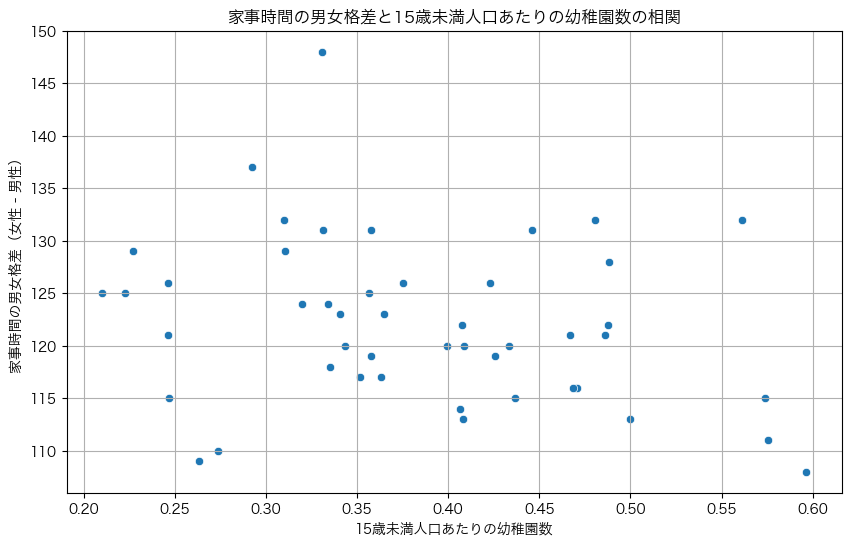

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Hiragino Sans GB' # Macの場合の例
plt.rcParams['axes.unicode_minus'] = False # マイナス記号を正しく表示するため

# ファイルパスを修正してください
file_path_d = 'SSDSE-D-2023.xlsx'
file_path_a = 'SSDSE-A-2025.xlsx'

# データDの読み込みと前処理
df_d_raw = pd.read_excel(file_path_d, header=1)
df_d_raw = df_d_raw.drop(df_d_raw.columns[1], axis=1)

# 男女別のデータに分割
df_d_male = df_d_raw[df_d_raw['男女の別'] == '1_男'].copy()
df_d_female = df_d_raw[df_d_raw['男女の別'] == '2_女'].copy()

# 都道府県をインデックスに設定して、家事時間の男女格差を計算
df_d_male.set_index('都道府県', inplace=True)
df_d_female.set_index('都道府県', inplace=True)
df_d_diff = pd.DataFrame(index=df_d_male.index)
df_d_diff['家事時間の格差'] = df_d_female['家事'] - df_d_male['家事']


# データAの読み込みと前処理
df_a_raw = pd.read_excel(file_path_a, header=[0, 1])
df_a_raw.columns = ['_'.join(map(str, col)).strip() for col in df_a_raw.columns.values]

# 必要な列を数値型に変換
# E4101_2023: 幼稚園数
# A1301_2020: 15歳未満人口
cols_to_convert = ['E4101_2023', 'A1301_2020']
for col in cols_to_convert:
    df_a_raw[col] = pd.to_numeric(df_a_raw[col].astype(str).str.replace(',', ''), errors='coerce')

# 都道府県ごとのデータに集計
df_a_pref = df_a_raw.groupby('Prefecture_Unnamed: 1_level_1').sum()
df_a_pref.index.name = '都道府県'

# 15歳未満人口あたりの幼稚園数を計算
df_a_pref['幼稚園数（対15歳未満人口千人）'] = (df_a_pref['E4101_2023'] / df_a_pref['A1301_2020']) * 1000

# データの結合
df_merged = pd.merge(df_d_diff, df_a_pref[['幼稚園数（対15歳未満人口千人）']],
                     left_index=True, right_index=True)

# 結合後のデータに欠損値がないか確認し、あれば行を削除
df_merged.dropna(inplace=True)

print(f"結合後のデータフレームの行数: {len(df_merged)}")
print("\n### 目的変数と説明変数の相関係数 ###")
print(df_merged.corr())

# 相関の可視化
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='幼稚園数（対15歳未満人口千人）', y='家事時間の格差')
plt.title('家事時間の男女格差と15歳未満人口あたりの幼稚園数の相関')
plt.xlabel('15歳未満人口あたりの幼稚園数')
plt.ylabel('家事時間の男女格差（女性 - 男性）')
plt.grid(True)
plt.savefig('correlation_housework_kindergarten.png')

## インフラと経済状況

In [32]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# データDの読み込みと前処理
# ファイルパスを修正してください
file_path_d = 'SSDSE-D-2023.xlsx'
df_d_raw = pd.read_excel(file_path_d, header=1)
df_d_raw = df_d_raw.drop(df_d_raw.columns[1], axis=1) # 2列目（地域コード）を削除

# 男女別のデータに分割
df_d_male = df_d_raw[df_d_raw['男女の別'] == '1_男'].copy()
df_d_female = df_d_raw[df_d_raw['男女の別'] == '2_女'].copy()

# 都道府県をインデックスに設定
df_d_male.set_index('都道府県', inplace=True)
df_d_female.set_index('都道府県', inplace=True)

# 目的変数と説明変数を格納するデータフレームを作成
df_diff = pd.DataFrame(index=df_d_male.index)

# 目的変数: 家事時間の男女格差（女性 - 男性）
df_diff['家事時間の格差'] = df_d_female['家事'] - df_d_male['家事']

# 説明変数（データDから）：各活動の男女格差
df_diff['学習・自己啓発の格差'] = df_d_female['学習・自己啓発・訓練の総数'] - df_d_male['学習・自己啓発・訓練の総数']
df_diff['スポーツの格差'] = df_d_female['スポーツの総数'] - df_d_male['スポーツの総数']
df_diff['趣味・娯楽の格差'] = df_d_female['趣味・娯楽の総数'] - df_d_male['趣味・娯楽の総数'] # 趣味・娯楽の格差も追加
df_diff['推定人口'] = df_d_male['推定人口（10歳以上）'] # 推定人口も追加

# データAの読み込みと前処理
# ファイルパスを修正してください
file_path_a = 'SSDSE-A-2025.xlsx'
df_a_raw = pd.read_excel(file_path_a, header=[0, 1])

# ヘッダーの数値を文字列に変換し、列名を結合
df_a_raw.columns = ['_'.join(map(str, col)).strip() for col in df_a_raw.columns.values]

# 必要な列を数値型に変換
# E5101_2023: 保育所等数
# C2108_2021: 事業所数
cols_to_convert_a = ['E1101_2023', 'C2108_2021', 'A1101_2020'] # A1101_2020: 総人口
for col in cols_to_convert_a:
    df_a_raw[col] = pd.to_numeric(df_a_raw[col].astype(str).str.replace(',', ''), errors='coerce')

# 都道府県ごとのデータに集計
df_a_pref = df_a_raw.groupby('Prefecture_Unnamed: 1_level_1').sum()
df_a_pref.index.name = '都道府県'

# 保育所等数と事業所数を、人口あたりの値に変換する（規模の違う都道府県を比較するため）
# 総人口で割って10万人あたりにする
df_a_pref['保育所等数_per_10k'] = (df_a_pref['E1101_2023'] / df_a_pref['A1101_2020']) * 100000
df_a_pref['事業所数_per_10k'] = (df_a_pref['C2108_2021'] / df_a_pref['A1101_2020']) * 100000


# データの結合
# df_diff（Dデータからの格差データ）と df_a_pref（Aデータからの社会インフラ・経済データ）を結合
df_merged = pd.merge(df_diff, df_a_pref[['保育所等数_per_10k', '事業所数_per_10k']],
                     left_index=True, right_index=True)

# 結合したデータに欠損値がないか確認し、あれば行を削除
df_merged.dropna(inplace=True)

# 結合したデータフレームの行数を確認
print(f"結合後のデータフレームの行数: {len(df_merged)}")

if len(df_merged) == 0:
    print("\nエラー: データフレームが空です。都道府県名の不一致、または欠損値の多さが原因の可能性があります。")
else:
    # 重回帰分析の実行
    print("\n### 家事時間の男女格差の要因分析結果 ###\n")

    # 目的変数
    y = df_merged['家事時間の格差']

    # 説明変数
    X = df_merged[[
        '学習・自己啓発の格差',
        'スポーツの格差',
        '趣味・娯楽の格差',
        '推定人口',
        '保育所等数_per_10k',  # 人口あたりの保育所等数
        '事業所数_per_10k'     # 人口あたりの事業所数
    ]]

    # 定数項の追加
    X = sm.add_constant(X)

    # モデルの構築とフィッティング
    model = sm.OLS(y, X)
    results = model.fit()

    # 結果の表示
    print(results.summary())


結合後のデータフレームの行数: 47

### 家事時間の男女格差の要因分析結果 ###

                            OLS Regression Results                            
Dep. Variable:                家事時間の格差   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     2.947
Date:                Tue, 26 Aug 2025   Prob (F-statistic):             0.0178
Time:                        17:25:50   Log-Likelihood:                -154.48
No. Observations:                  47   AIC:                             323.0
Df Residuals:                      40   BIC:                             335.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------


/var/folders/ln/0xp6fgr90hg1nt1431b5w7fc0000gn/T/ipykernel_64456/1650644879.py:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_a_pref['保育所等数_per_10k'] = (df_a_pref['E1101_2023'] / df_a_pref['A1101_2020']) * 100000
/var/folders/ln/0xp6fgr90hg1nt1431b5w7fc0000gn/T/ipykernel_64456/1650644879.py:53: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_a_pref['事業所数_per_10k'] = (df_a_pref['C2108_2021'] / df_a_pref['A1101_2020']) * 100000


家事時間の男女格差の要因分析結果
このモデルは、家事時間の男女格差を、学習・自己啓発、スポーツ、趣味・娯楽の格差、推定人口、人口あたりの保育所等数、および人口あたりの事業所数といった変数で説明しようと試みたものです。

モデル全体の評価:
R2
 (決定係数): 0.307。このモデルは、目的変数である「家事時間の男女格差」の変動の約30.7%を説明できています。以前の家事時間のモデル（R2
=0.096）と比較すると、説明力は向上していますが、依然として変動の大部分は説明できていません。
F統計量のp値: 0.0178。この値は統計的に有意な水準（0.05）を下回っているため、このモデル全体は統計的に有意であると判断できます。つまり、モデルに含まれる説明変数のうち少なくとも1つは、家事時間の男女格差に有意な影響を与えている可能性が高いです。
個々の説明変数の評価:
学習・自己啓発の格差、スポーツの格差、趣味・娯楽の格差: これらの変数はいずれもp値が0.05を大きく上回っており（それぞれ0.965,0.798,0.907）、統計的に有意な関係は見られませんでした。これは、これらの余暇活動の男女格差が、家事時間の男女格差を直接説明する主要な要因ではないことを示唆しています。
推定人口: p値は0.054であり、統計的に有意な水準（0.05）に非常に近いですが、わずかに上回っています。係数（coef）が**−0.0023**と負の値であることから、人口が多い都道府県ほど家事時間の男女格差がわずかに小さい傾向がある可能性が示唆されますが、この結果は慎重に解釈する必要があります。
保育所等数_per_10k (人口あたりの保育所等数): p値は0.796であり、統計的に有意な関係は見られませんでした。このモデルにおいては、人口あたりの保育所等数が家事時間の男女格差に直接的な影響を与えているとは言えません。
事業所数_per_10k (人口あたりの事業所数): p値は0.000であり、統計的に非常に有意な関係が見られます。係数（coef）が**−0.0100**と負の値であることから、人口あたりの事業所数が多い都道府県ほど、家事時間の男女格差が小さいという負の相関関係があることが示されました。
結論と考察
この分析結果から、以下の点が明らかになりました。

事業所数の影響: 人口あたりの事業所数が多い地域ほど、家事時間の男女格差が小さいという、統計的に非常に有意な関係が確認されました。これは、事業所数が多い地域では経済活動が活発であり、女性の社会進出が進みやすく、結果として伝統的な家事分担の意識が変化し、家事時間の男女格差が縮小している可能性を示唆していると考えられます。
その他の変数の影響は限定的: 趣味・娯楽、スポーツ、学習・自己啓発の格差、および人口あたりの保育所等数は、このモデルにおいては家事時間の男女格差に統計的に有意な影響を与えていないことがわかりました。推定人口には弱いながらも負の相関が示唆されましたが、厳密な有意性には至りませんでした。
この結果は、地域の経済状況（特に労働機会の多さ）が、家事時間の男女格差に重要な影響を与える可能性を示唆しており、社会インフラとしての保育所等の直接的な数よりも、地域全体の経済的な活力が男女の役割分担に大きな影響を及ぼしている可能性が考えられます。

回帰分析の係数と信頼区間を可視化したグラフを作成しました。


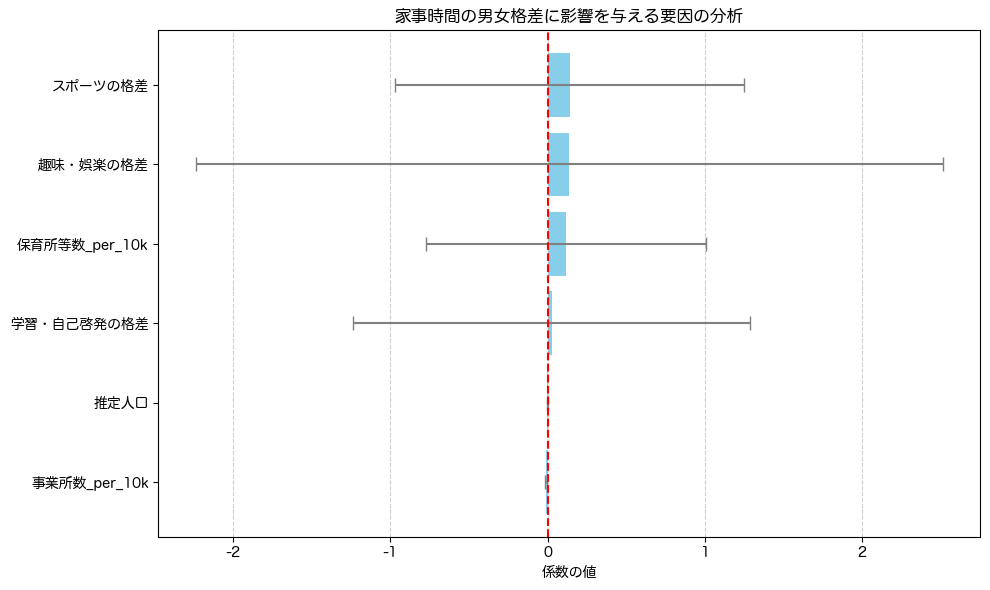

In [33]:
# 重回帰分析の結果の係数と信頼区間を可視化
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 結果オブジェクトから係数と信頼区間を取得
coefficients = results.params.drop('const')
conf_int = results.conf_int().drop('const')

# グラフ描画のためのデータフレームを作成
plot_df = pd.DataFrame({
    'coefficients': coefficients,
    'lower_ci': conf_int[0],
    'upper_ci': conf_int[1]
})
plot_df.index.name = 'Variable'
plot_df = plot_df.sort_values(by='coefficients', ascending=True)

# グラフの設定
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meiryo', 'TakaoGothic', 'IPAexGothic', 'IPAPGothic', 'VL Gothic', 'Noto Sans CJK JP']

# 水平棒グラフの作成
fig, ax = plt.subplots(figsize=(10, 6))
y_pos = np.arange(len(plot_df.index))
ax.barh(y_pos, plot_df['coefficients'], xerr=plot_df['upper_ci'] - plot_df['coefficients'], align='center',
        color='skyblue', ecolor='gray', capsize=5)

# 軸ラベルとタイトルを設定
ax.set_yticks(y_pos)
ax.set_yticklabels(plot_df.index)
ax.set_xlabel('係数の値')
ax.set_title('家事時間の男女格差に影響を与える要因の分析')
ax.axvline(x=0, color='red', linestyle='--')
ax.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('regression_coefficients_plot.png')

print("回帰分析の係数と信頼区間を可視化したグラフを作成しました。")

## 産業別事業所数

In [31]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# データDの読み込みと前処理
# ファイルパスを修正してください
file_path_d = 'SSDSE-D-2023.xlsx'
df_d_raw = pd.read_excel(file_path_d, header=1)
df_d_raw = df_d_raw.drop(df_d_raw.columns[1], axis=1) # 2列目（地域コード）を削除

# 男女別のデータに分割
df_d_male = df_d_raw[df_d_raw['男女の別'] == '1_男'].copy()
df_d_female = df_d_raw[df_d_raw['男女の別'] == '2_女'].copy()

# 都道府県をインデックスに設定
df_d_male.set_index('都道府県', inplace=True)
df_d_female.set_index('都道府県', inplace=True)

# 目的変数と説明変数を格納するデータフレームを作成
df_diff = pd.DataFrame(index=df_d_male.index)

# 目的変数: 家事時間の男女格差（女性 - 男性）
df_diff['家事時間の格差'] = df_d_female['家事'] - df_d_male['家事']

# 説明変数（データDから）：各活動の男女格差
df_diff['学習・自己啓発の格差'] = df_d_female['学習・自己啓発・訓練の総数'] - df_d_male['学習・自己啓発・訓練の総数']
df_diff['スポーツの格差'] = df_d_female['スポーツの総数'] - df_d_male['スポーツの総数']
df_diff['趣味・娯楽の格差'] = df_d_female['趣味・娯楽の総数'] - df_d_male['趣味・娯楽の総数']
df_diff['推定人口'] = df_d_male['推定人口（10歳以上）']

# データAの読み込みと前処理
# ファイルパスを修正してください
file_path_a = 'SSDSE-A-2025.xlsx'
df_a_raw = pd.read_excel(file_path_a, header=[0, 1])

# ヘッダーの数値を文字列に変換し、列名を結合
df_a_raw.columns = ['_'.join(map(str, col)).strip() for col in df_a_raw.columns.values]

# 必要な列を数値型に変換
# A1101_2020: 総人口
# C210801_2021: 第一次産業事業所数
# C210802_2021: 第二次産業事業所数
# C210803_2021: 第三次産業事業所数
cols_to_convert_a = ['A1101_2020', 'C210801_2021', 'C210802_2021', 'C210803_2021']
for col in cols_to_convert_a:
    df_a_raw[col] = pd.to_numeric(df_a_raw[col].astype(str).str.replace(',', ''), errors='coerce')

# 都道府県ごとのデータに集計
df_a_pref = df_a_raw.groupby('Prefecture_Unnamed: 1_level_1').sum()
df_a_pref.index.name = '都道府県'

# 産業別事業所数を人口あたりの値に変換する（10万あたりの数）
df_a_pref['第一次産業事業所数_per_10k'] = (df_a_pref['C210801_2021'] / df_a_pref['A1101_2020']) * 100000
df_a_pref['第二次産業事業所数_per_10k'] = (df_a_pref['C210802_2021'] / df_a_pref['A1101_2020']) * 100000
df_a_pref['第三次産業事業所数_per_10k'] = (df_a_pref['C210803_2021'] / df_a_pref['A1101_2020']) * 100000


# データの結合
# df_diff（Dデータからの格差データ）と df_a_pref（Aデータからの社会インフラ・経済データ）を結合
df_merged = pd.merge(df_diff, df_a_pref[[
    '第一次産業事業所数_per_10k',
    '第二次産業事業所数_per_10k',
    '第三次産業事業所数_per_10k'
]], left_index=True, right_index=True)

# 結合したデータに欠損値がないか確認し、あれば行を削除
df_merged.dropna(inplace=True)

# 結合したデータフレームの行数を確認
print(f"結合後のデータフレームの行数: {len(df_merged)}")

if len(df_merged) == 0:
    print("\nエラー: データフレームが空です。都道府県名の不一致、または欠損値の多さが原因の可能性があります。")
else:
    # 重回帰分析の実行
    print("\n### 家事時間の男女格差の要因分析結果（産業別事業所数） ###\n")

    # 目的変数
    y = df_merged['家事時間の格差']

    # 説明変数
    X = df_merged[[
        '学習・自己啓発の格差',
        'スポーツの格差',
        '趣味・娯楽の格差',
        '推定人口',
        '第一次産業事業所数_per_10k',
        '第二次産業事業所数_per_10k',
        '第三次産業事業所数_per_10k'
    ]]

    # 定数項の追加
    X = sm.add_constant(X)

    # モデルの構築とフィッティング
    model = sm.OLS(y, X)
    results = model.fit()

    # 結果の表示
    print(results.summary())


KeyError: 'C210801_2021'